In [65]:
%matplotlib widget

# Figures

In [66]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import pandas as pd
import copy
import matplotlib

import sys
sys.path.insert(1, '../src')

from EM1D import EMf_2Lay_HV_field

In [67]:
# Load models
model_GS = np.load('results/model_2Lay_GS_field.npy')
model_opt = np.load('results/model_2Lay_Opt_field.npy')
model_GSplusOpt = np.load('results/model_2Lay_GSplusOpt_field.npy')

# Load field data
Dataframe = pd.DataFrame(np.load('data/Field_data.npy'),
                        columns = ['X','Y','Position','Z','H2Q','H4Q','H8Q',
                                   'V2Q','V4Q','V8Q','P2Q','P4Q','P8Q',
                                   'H4IP','H8IP','V4IP','V8IP'])

elev = np.array(Dataframe['Z'])

data_true = np.array(pd.concat([Dataframe.loc[:,'H2Q':'V8Q'], 
                                      Dataframe.loc[:,'H4IP':]], axis=1))
#data_true_line1 = np.array(Dataframe.loc[850:900,'H2Q':'V8IP'])
#data_true_line37 = np.array(Dataframe.loc[1800,'H2Q':'V8IP'])

# Load survey parameters
survey = np.load('data/survey_field.npy', allow_pickle=True).item()
offsets = survey['offsets']
height = survey['height']
freq = survey['freq']
lambd = survey['lambd']
filt = survey['filt']

In [68]:
def grid_elev(model, elev, depthmax=10):
    """ Generates a grid from the model to plot a 2D section
    including elevation"""
    # Arrays for plotting
    depthmax_ = -np.min(elev) + depthmax
    npos = np.shape(model)[0]
    ny = 81 # size of the grid in y direction
    y = np.linspace(0, depthmax_, ny)
    grid = np.zeros((npos, ny))
    xx = np.linspace(0,npos+1,npos+1, endpoint=False)
    sig = model[:,:2].copy()
    thk = model[:,2].copy() - elev
    
    # Conductivities to be plotted in a grid
    for i in range(npos):
        y1 = 0
        y2 = 0
        while y[y1] <= -elev[i]:
            grid[i, y1] = 0
            y1 += 1
        while y[y1] <= thk[i]:
            grid[i, y1] = sig[i, 0]
            y1 += 1
            y2 = y1
        grid[i, y2:] = sig[i, 1]
        
    return grid

def rmse_a(p, o):
    """ Calculates the root mean squared error of an array
    p -> predicted
    o -> observed """
    error = np.sqrt(np.sum((p-o)**2))/len(p)
    return error

In [69]:
# Review lines

Line1_pos = np.linspace(0,49,49,endpoint=False,dtype=int)
Line2_pos = np.linspace(900,949,949,endpoint=False,dtype=int)
Line3_pos = np.linspace(1650,1699,1699,endpoint=False, dtype=int)

Line1_GS_grd = grid_elev(model_GS[Line1_pos,:], elev[Line1_pos])
Line1_opt_grd = grid_elev(model_opt[Line1_pos,:], elev[Line1_pos])
Line1_GSplusOpt_grd = grid_elev(model_GSplusOpt[Line1_pos,:], elev[Line1_pos])

Line2_GS_grd = grid_elev(model_GS[Line2_pos,:], elev[Line2_pos])
Line2_opt_grd = grid_elev(model_opt[Line2_pos,:], elev[Line2_pos])
Line2_GSplusOpt_grd = grid_elev(model_GSplusOpt[Line2_pos,:], elev[Line2_pos])

Line3_GS_grd = grid_elev(model_GS[Line3_pos,:], elev[Line3_pos])
Line3_opt_grd = grid_elev(model_opt[Line3_pos,:], elev[Line3_pos])
Line3_GSplusOpt_grd = grid_elev(model_GSplusOpt[Line3_pos,:], elev[Line3_pos])

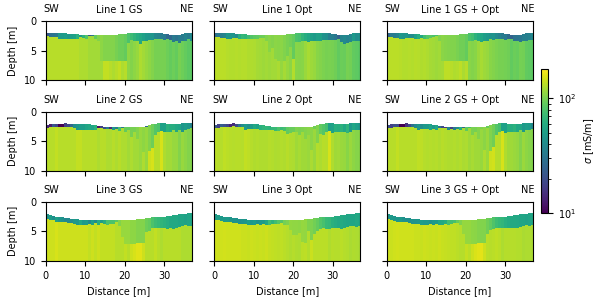

In [70]:


fig, ax = plt.subplots(3,3, sharex=True, sharey=True, layout='constrained',
                      figsize=(6,3))

vmin=10
vmax=180
cmap='viridis'
interp='none'
npos = 51
ext=[0,37,10,0]
norm= colors.LogNorm(vmin=vmin, vmax=vmax)
fs=7 # fontsize

my_cmap = copy.copy(matplotlib.cm.get_cmap('viridis')) # copy the default cmap
my_cmap.set_bad('w')

# Line 1
mod = ax[0,0].imshow((Line1_GS_grd*1000).T, cmap=my_cmap, interpolation=interp, 
                    extent=ext, norm = norm)
ax[0,0].set_title('Line 1 GS', fontsize=fs)
ax[0,0].set_ylabel('Depth [m]', fontsize=fs)
ax[0,0].tick_params(labelsize=fs)
ax[0,0].text(-0.5,-1.5,'SW', color='k',fontsize=fs)
ax[0,0].text(34,-1.5,'NE', color='k',fontsize=fs)

ax[0,1].imshow((Line1_opt_grd*1000).T, cmap=my_cmap, interpolation=interp, 
                    extent=ext, norm = norm)
ax[0,1].set_title('Line 1 Opt', fontsize=fs)
ax[0,1].tick_params(labelsize=fs)
ax[0,1].text(-0.5,-1.5,'SW', color='k',fontsize=fs)
ax[0,1].text(34,-1.5,'NE', color='k',fontsize=fs)

ax[0,2].imshow((Line1_GSplusOpt_grd*1000).T, cmap=my_cmap, interpolation=interp, 
                    extent=ext, norm = norm)
ax[0,2].set_title('Line 1 GS + Opt', fontsize=fs)
ax[0,2].tick_params(labelsize=fs)
ax[0,2].text(-0.5,-1.5,'SW', color='k',fontsize=fs)
ax[0,2].text(34,-1.5,'NE', color='k',fontsize=fs)

#Line 2
ax[1,0].imshow((Line2_GS_grd*1000).T, cmap=my_cmap, interpolation=interp, 
                    extent=ext, norm = norm)
ax[1,0].set_title('Line 2 GS', fontsize=fs)
ax[1,0].set_ylabel('Depth [m]', fontsize=fs)
ax[1,0].tick_params(labelsize=fs)
ax[1,0].text(-0.5,-1.5,'SW', color='k',fontsize=fs)
ax[1,0].text(34,-1.5,'NE', color='k',fontsize=fs)

ax[1,1].imshow((Line2_opt_grd*1000).T, cmap=my_cmap, interpolation=interp, 
                    extent=ext, norm = norm)
ax[1,1].set_title('Line 2 Opt', fontsize=fs)
ax[1,1].tick_params(labelsize=fs)
ax[1,1].text(-0.5,-1.5,'SW', color='k',fontsize=fs)
ax[1,1].text(34,-1.5,'NE', color='k',fontsize=fs)

ax[1,2].imshow((Line2_GSplusOpt_grd*1000).T, cmap=my_cmap, interpolation=interp, 
                    extent=ext, norm = norm)
ax[1,2].set_title('Line 2 GS + Opt', fontsize=fs)
ax[1,2].tick_params(labelsize=fs)
ax[1,2].text(-0.5,-1.5,'SW', color='k',fontsize=fs)
ax[1,2].text(34,-1.5,'NE', color='k',fontsize=fs)

# Line 3
ax[2,0].imshow((Line3_GS_grd*1000).T, cmap=my_cmap, interpolation=interp, 
                    extent=ext, norm = norm)
ax[2,0].set_title('Line 3 GS', fontsize=fs)
ax[2,0].set_ylabel('Depth [m]', fontsize=fs)
ax[2,0].tick_params(labelsize=fs)
ax[2,0].text(-0.5,-1.5,'SW', color='k',fontsize=fs)
ax[2,0].text(34,-1.5,'NE', color='k',fontsize=fs)
ax[2,0].set_xlabel('Distance [m]', fontsize=fs)

ax[2,1].imshow((Line3_opt_grd*1000).T, cmap=my_cmap, interpolation=interp, 
                    extent=ext, norm = norm)
ax[2,1].set_title('Line 3 Opt', fontsize=fs)
ax[2,1].tick_params(labelsize=fs)
ax[2,1].text(-0.5,-1.5,'SW', color='k',fontsize=fs)
ax[2,1].text(34,-1.5,'NE', color='k',fontsize=fs)
ax[2,1].set_xlabel('Distance [m]', fontsize=fs)

ax[2,2].imshow((Line3_GSplusOpt_grd*1000).T, cmap=my_cmap, interpolation=interp, 
                    extent=ext, norm = norm)
ax[2,2].set_title('Line 3 GS + Opt', fontsize=fs)
ax[2,2].tick_params(labelsize=fs)
ax[2,2].text(-0.5,-1.5,'SW', color='k',fontsize=fs)
ax[2,2].text(34,-1.5,'NE', color='k',fontsize=fs)
ax[2,2].set_xlabel('Distance [m]', fontsize=fs)

clb_mod = fig.colorbar(mod, ax=ax[:,2], location='right', shrink=0.6)
clb_mod.ax.tick_params(labelsize=fs)
clb_mod.set_label('$\sigma$ [mS/m]', fontsize=fs )

ax[0,0].set_aspect(aspect=1.5)
ax[0,1].set_aspect(aspect=1.5)
ax[0,2].set_aspect(aspect=1.5)

ax[1,0].set_aspect(aspect=1.5)
ax[1,1].set_aspect(aspect=1.5)
ax[1,2].set_aspect(aspect=1.5)

ax[2,0].set_aspect(aspect=1.5)
ax[2,1].set_aspect(aspect=1.5)
ax[2,2].set_aspect(aspect=1.5)
plt.savefig('figures/Field_Lines_2Lay.eps', format='eps')

In [71]:
# Simulate data for each model

data_GS = []
data_opt = []
data_GSplusOpt = []

for pos in range(len(data_true)):
    
    data_GS.append(EMf_2Lay_HV_field(lambd,
                                      sigma1 = model_GS[pos,0],
                                      sigma2 = model_GS[pos,1],
                                      h1 = model_GS[pos,2],
                                      height = height,
                                      offsets = offsets,
                                      freq = freq,
                                      filt = filt))

    data_opt.append(EMf_2Lay_HV_field(lambd,
                                      sigma1 = model_opt[pos,0],
                                      sigma2 = model_opt[pos,1],
                                      h1 = model_opt[pos,2],
                                      height = height,
                                      offsets = offsets,
                                      freq = freq,
                                      filt = filt))

    data_GSplusOpt.append(EMf_2Lay_HV_field(lambd,
                                      sigma1 = model_GSplusOpt[pos,0],
                                      sigma2 = model_GSplusOpt[pos,1],
                                      h1 = model_GSplusOpt[pos,2],
                                      height = height,
                                      offsets = offsets,
                                      freq = freq,
                                      filt = filt))

In [72]:
# Transform to parts per thousand [ppt]

data_GS = np.array(data_GS)*1e3
data_opt = np.array(data_opt)*1e3
data_GSplusOpt = np.array(data_GSplusOpt)*1e3
data_true = data_true*1e3

In [73]:
# Calculate RMSE for each method

RMSE_GS= rmse_a(data_GS, data_true)
RMSE_opt = rmse_a(data_opt, data_true)
RMSE_GSplusOpt = rmse_a(data_GSplusOpt, data_true)

In [74]:
# Print RMSE in ppt

RMSE = pd.DataFrame([RMSE_GS, RMSE_opt, RMSE_GSplusOpt],
                    index= ['GS', 'Opt', 'GSplusOpt'],
                   columns=['RMSE [ppt]'])

RMSE

,RMSE [ppt]
GS,0.361470
Opt,0.368619
GSplusOpt,0.361040
